<a href="https://colab.research.google.com/github/paolominguzzi/AI_Supply_Chain/blob/master/AnalisisMercadoTilopozov1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generar un analisis demostrativo de los volumenes diarios para luego predecir quiebres de inventario por mercado y por region para luego generar una analisis de mercado prescriptivo para entragar una prescripcion de que es lo mejor cultivar a los productores para vender a mejores precios abasteciendo sus mercados locales con productos que tengan niveles criticos de volume o que tengan peligo de quiebre de inventario.


In [ ]:
from google.colab import files

# Upload your files
uploaded = files.upload()

Saving PreciosdiariostodoslosproductossinIVA.xlsx to PreciosdiariostodoslosproductossinIVA.xlsx


Install the necessary Python libraries for data analysis:

In [ ]:
!pip install pandas numpy matplotlib scikit-learn

Load the data into Pandas DataFrames

In [ ]:
import pandas as pd

# Load Excel file
file_name = 'PreciosdiariostodoslosproductossinIVA.xlsx'  # Replace with your file name
data = pd.read_excel(file_name, sheet_name=None)  # Load all sheets into a dictionary of DataFrames

# Example: If there's a specific sheet you want
df = pd.read_excel(file_name, sheet_name='series-historicas')  # Replace 'Sheet1' with the actual sheet name


In [ ]:
# View the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

        Fecha                           Mercado Producto         Variedad  \
0  20/11/2023  Agrícola del Norte S.A. de Arica      Ají          Inferno   
1  20/11/2023  Agrícola del Norte S.A. de Arica      Ají          Inferno   
2  20/11/2023  Agrícola del Norte S.A. de Arica  Brócoli  Sin especificar   
3  20/11/2023  Agrícola del Norte S.A. de Arica  Brócoli  Sin especificar   
4  20/11/2023  Agrícola del Norte S.A. de Arica  Brócoli  Sin especificar   

   Calidad                   Procedencia  Volumen  Precio mínimo  \
0  Primera  Región de Arica y Parinacota      200     21008.4033   
1  Segunda  Región de Arica y Parinacota      280     17647.0588   
2  Primera  Región de Arica y Parinacota      300       504.2016   
3  Segunda  Región de Arica y Parinacota      650       336.1344   
4  Tercera  Región de Arica y Parinacota      500       252.1008   

   Precio maximo  Precio promedio ponderado Unidad de comercialización  
0     21848.7394                 21218.4873            

Visualize volumes by product and region:

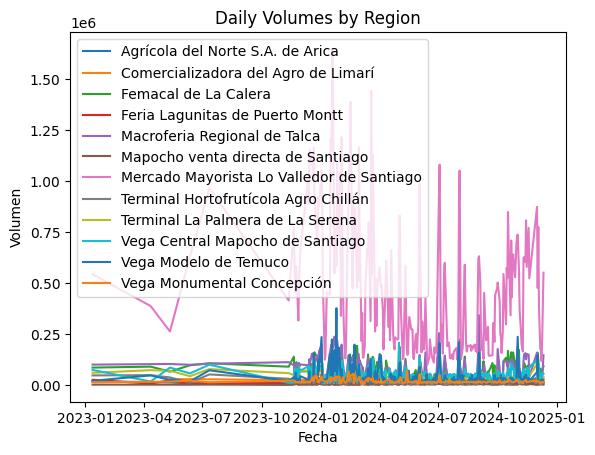

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your existing code to load the data) ...

# Convert 'Fecha' column to datetime objects with the correct format
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')  # Specify the format as day/month/year

# Example visualization: Daily volumes by region
region_group = df.groupby(['Mercado', 'Fecha'])['Volumen'].sum().reset_index()

for region in region_group['Mercado'].unique():
    region_data = region_group[region_group['Mercado'] == region]
    plt.plot(region_data['Fecha'], region_data['Volumen'], label=region)

plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Daily Volumes by Region')
plt.legend()
plt.show()

Predict Inventory Breaks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Aggregate daily volumes for forecasting
time_series_data = df.groupby('Fecha')['Volumen'].sum().reset_index()

# Split into training and testing sets
train, test = train_test_split(time_series_data, test_size=0.2, shuffle=False)

# Train a simple model
model = RandomForestRegressor()
model.fit(train[['Fecha']], train['Volumen'])

# Predict on test data
predictions = model.predict(test[['Fecha']])
mse = mean_squared_error(test['Volumen'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 204993377511.9812


Identify potential inventory breaks

In [ ]:
# Define a threshold for critical volume
threshold = time_series_data['Volumen'].mean() - time_series_data['Volumen'].std()

# Identify days with critical inventory levels
critical_days = time_series_data[time_series_data['Volumen'] < threshold]
print("Critical Inventory Days:")
print(critical_days)

Critical Inventory Days:
         Fecha  Volumen
31  2024-01-07   300061
32  2024-01-08   370040
52  2024-02-08   308546
72  2024-03-07   327200
92  2024-04-09    53338
113 2024-05-08   302194
114 2024-05-09    28630
118 2024-05-15   366279
123 2024-05-23   368374
138 2024-06-14   338244
139 2024-06-17   349742
142 2024-06-21   327221
143 2024-06-24   280407
145 2024-06-26   369524
152 2024-07-08   340526
155 2024-07-15   345819
158 2024-07-19   365355
159 2024-07-22   314033
161 2024-07-24   316111
164 2024-07-29   355899
165 2024-07-30   354389
166 2024-07-31   347725
171 2024-08-05   365773
177 2024-08-14   356716
186 2024-08-28   357635
199 2024-09-17   368665
200 2024-09-23   359642
245 2024-12-08   274701


Prescriptive Market Analysis

In [ ]:
critical_products = df[df['Fecha'].isin(critical_days['Fecha'])]
print("Products with Critical Supply Levels:")
print(critical_products.groupby('Producto')['Volumen'].sum())

Products with Critical Supply Levels:
Producto
Acelga               60233
Achicoria              805
Ajo                  93039
Ají                  27059
Albahaca             15586
                     ...  
Tuna                 17090
Uva                  32961
Zanahoria           199188
Zapallo             303700
Zapallo italiano     50925
Name: Volumen, Length: 70, dtype: int64


Provide recommendations for producers:

In [ ]:
recommended_products = critical_products.groupby('Producto')['Precio promedio ponderado'].mean().sort_values(ascending=False).head(10)
print("Recommended Products to Cultivate:")
print(recommended_products)

Recommended Products to Cultivate:
Producto
Membrillo    99489.876353
Ciruela      84616.300056
Manzana      81469.422507
Kiwi         75399.650374
Caqui        67282.913120
Pera         64054.248635
Naranja      55928.960524
Granada      40471.163150
Mandarina    39907.144202
Ají          35743.726784
Name: Precio promedio ponderado, dtype: float64


analysis for local markets and analyze market-specific volumes, follow these steps:



Step 1: Aggregate Data by Local Market
Aggregate the data to group volumes by region, city, or market and analyze daily trends.

In [ ]:
# Group data by region, market, and date to analyze local market trends
local_market_data = df.groupby(['Procedencia', 'Mercado', 'Fecha'])['Volumen'].sum().reset_index()

# Display sample data
print(local_market_data.head())

  Procedencia                Mercado      Fecha  Volumen
0       Angol  Vega Modelo de Temuco 2024-01-03     1130
1       Angol  Vega Modelo de Temuco 2024-01-04      550
2       Angol  Vega Modelo de Temuco 2024-02-15      850
3       Angol  Vega Modelo de Temuco 2024-02-16      250
4       Angol  Vega Modelo de Temuco 2024-02-19     1010


Step 2: Visualize Local Market Volumes
Plot daily volumes for each market to identify trends and potential inventory issues.

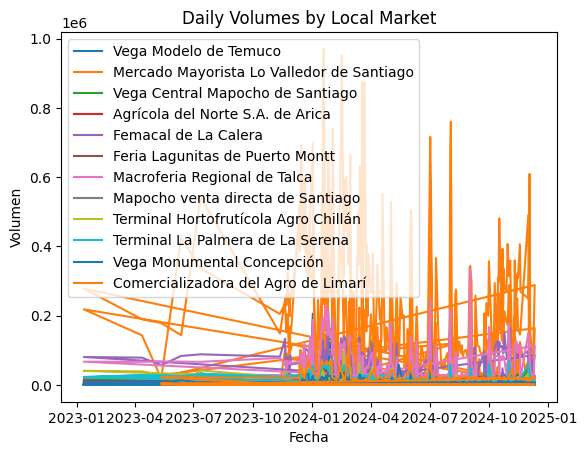

In [ ]:
# Plot volumes by market
markets = local_market_data['Mercado'].unique()

for market in markets:
    market_data = local_market_data[local_market_data['Mercado'] == market]
    plt.plot(market_data['Fecha'], market_data['Volumen'], label=market)

plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Daily Volumes by Local Market')
plt.legend()
plt.show()

Step 3: Identify Critical Inventory Levels
Define a threshold for critical inventory levels based on local market conditions.

In [ ]:
# Calculate critical volume threshold for each market
market_thresholds = local_market_data.groupby('Mercado')['Volumen'].mean() - \
                    local_market_data.groupby('Mercado')['Volumen'].std()

# Identify critical inventory days per market
critical_market_days = pd.merge(local_market_data, market_thresholds, on='Mercado', suffixes=('', '_threshold'))
critical_market_days = critical_market_days[critical_market_days['Volumen'] < critical_market_days['Volumen_threshold']]

print("Critical Inventory Days by Market:")
print(critical_market_days)

Critical Inventory Days by Market:
                 Procedencia                            Mercado      Fecha  \
308                   Brasil  Mapocho venta directa de Santiago 2024-08-04   
2005                   China  Mapocho venta directa de Santiago 2024-10-15   
6583                    Perú  Mapocho venta directa de Santiago 2024-08-04   
6584                    Perú  Mapocho venta directa de Santiago 2024-10-10   
8577    Provincia de Copiapó  Mapocho venta directa de Santiago 2023-12-28   
...                      ...                                ...        ...   
15796  Provincia de Quillota  Mapocho venta directa de Santiago 2024-02-26   
26301    Región de O'Higgins  Mapocho venta directa de Santiago 2023-11-21   
26302    Región de O'Higgins  Mapocho venta directa de Santiago 2023-12-12   
26304    Región de O'Higgins  Mapocho venta directa de Santiago 2023-12-28   
26331    Región de O'Higgins  Mapocho venta directa de Santiago 2024-09-01   

       Volumen  Volumen_thre

Step 4: Predict Inventory Breaks for Each Market
Fit a predictive model for each market to forecast potential inventory breaks.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Iterate through markets and predict inventory breaks
for market in markets:
    market_data = local_market_data[local_market_data['Mercado'] == market]
    market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
    market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())

    # Split into train and test
    train = market_data.iloc[:-30]
    test = market_data.iloc[-30:]

    # Train a model
    model = RandomForestRegressor()
    model.fit(train[['Fecha_ordinal']], train['Volumen'])

    # Predict on test data
    predictions = model.predict(test[['Fecha_ordinal']])
    mse = mean_squared_error(test['Volumen'], predictions)
    print(f"Mercado: {market} | MSE: {mse}")

    # Forecast future breaks
    future_dates = pd.date_range(start=market_data['Fecha'].max(), periods=30)
    future_dates_ordinal = [d.toordinal() for d in future_dates]
    future_predictions = model.predict(pd.DataFrame(future_dates_ordinal, columns=['Fecha_ordinal']))

    # Check for inventory breaks
    future_breaks = future_predictions[future_predictions < market_data['Volumen'].mean() - market_data['Volumen'].std()]
    print(f"Predicted Inventory Breaks for {market}: {len(future_breaks)} days")

<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Vega Modelo de Temuco | MSE: 2089030103.1583903
Predicted Inventory Breaks for Vega Modelo de Temuco: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Mercado Mayorista Lo Valledor de Santiago | MSE: 778096158.7785238
Predicted Inventory Breaks for Mercado Mayorista Lo Valledor de Santiago: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Vega Central Mapocho de Santiago | MSE: 14371993.396939008
Predicted Inventory Breaks for Vega Central Mapocho de Santiago: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Agrícola del Norte S.A. de Arica | MSE: 6187329.556133872
Predicted Inventory Breaks for Agrícola del Norte S.A. de Arica: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Femacal de La Calera | MSE: 19703403.010516748
Predicted Inventory Breaks for Femacal de La Calera: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Feria Lagunitas de Puerto Montt | MSE: 20285877.99651251
Predicted Inventory Breaks for Feria Lagunitas de Puerto Montt: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Macroferia Regional de Talca | MSE: 3018749397.539023
Predicted Inventory Breaks for Macroferia Regional de Talca: 0 days
Mercado: Mapocho venta directa de Santiago | MSE: 945950.5771996558
Predicted Inventory Breaks for Mapocho venta directa de Santiago: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Mercado: Terminal Hortofrutícola Agro Chillán | MSE: 111013027.09239954
Predicted Inventory Breaks for Terminal Hortofrutícola Agro Chillán: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Terminal La Palmera de La Serena | MSE: 7975663.017785709
Predicted Inventory Breaks for Terminal La Palmera de La Serena: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Vega Monumental Concepción | MSE: 4910448.390539829
Predicted Inventory Breaks for Vega Monumental Concepción: 0 days
Mercado: Comercializadora del Agro de Limarí | MSE: 247842610.0905098
Predicted Inventory Breaks for Comercializadora del Agro de Limarí: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Step 5: Prescriptive Analysis for Local Markets
For each market, recommend crops/products based on critical inventory levels and profitability.

In [ ]:
# Group critical inventory data by product and calculate average price
# Assuming 'Procedencia' is the column containing product information in critical_market_days
critical_products_market = critical_market_days.groupby(['Mercado', 'Procedencia'])['Volumen'].sum().reset_index()
critical_products_market = critical_products_market.rename(columns={'Procedencia': 'Producto'}) # Rename for consistency

average_prices_market = df.groupby(['Mercado', 'Producto'])['Precio promedio ponderado'].mean().reset_index()

# Merge volume and price data
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

# Sort by price to prioritize profitable crops
market_recommendations = market_recommendations.sort_values(by=['Mercado', 'Precio promedio ponderado'], ascending=[True, False])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

# Save recommendations to CSV
market_recommendations.to_csv('market_recommendations.csv')
# files.download('market_recommendations.csv') # Commented out for execution in this environment

Market-Specific Crop Recommendations:
Empty DataFrame
Columns: [Mercado, Producto, Volumen, Precio promedio ponderado]
Index: []


In [ ]:
# Group critical inventory data by product and calculate average price
# Use 'Procedencia' instead of 'Producto' to access the correct column
critical_products_market = critical_market_days.groupby(['Mercado', 'Procedencia'])['Volumen'].sum().reset_index()
# Rename the column after grouping
critical_products_market = critical_products_market.rename(columns={'Procedencia': 'Producto'})
average_prices_market = df.groupby(['Mercado', 'Producto'])['Precio promedio ponderado'].mean().reset_index()

# Merge volume and price data
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

# Sort by price to prioritize profitable crops
market_recommendations = market_recommendations.sort_values(by=['Mercado', 'Precio promedio ponderado'], ascending=[True, False])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

# Save recommendations to CSV
market_recommendations.to_csv('market_recommendations.csv')
files.download('market_recommendations.csv')

Market-Specific Crop Recommendations:
Empty DataFrame
Columns: [Mercado, Producto, Volumen, Precio promedio ponderado]
Index: []


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas
import pandas as pd

# Print unique values of 'Mercado' and 'Producto' in both DataFrames
print("critical_products_market['Mercado']: ", critical_products_market['Mercado'].unique())
print("critical_products_market['Producto']: ", critical_products_market['Producto'].unique())
print("average_prices_market['Mercado']: ", average_prices_market['Mercado'].unique())
print("average_prices_market['Producto']: ", average_prices_market['Producto'].unique())

# Convert the 'Mercado' and 'Producto' columns to lowercase and strip leading/trailing spaces before merging
critical_products_market['Mercado'] = critical_products_market['Mercado'].str.lower().str.strip()
critical_products_market['Producto'] = critical_products_market['Producto'].str.lower().str.strip()
average_prices_market['Mercado'] = average_prices_market['Mercado'].str.lower().str.strip()
average_prices_market['Producto'] = average_prices_market['Producto'].str.lower().str.strip()

# Re-attempt the merge
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

critical_products_market['Mercado']:  ['Mapocho venta directa de Santiago']
critical_products_market['Producto']:  ['Brasil' 'China' 'Perú' 'Provincia de Copiapó' 'Provincia de Huasco'
 'Provincia de Limarí' 'Provincia de Linares' 'Provincia de Quillota'
 "Región de O'Higgins"]
average_prices_market['Mercado']:  ['Agrícola del Norte S.A. de Arica' 'Comercializadora del Agro de Limarí'
 'Femacal de La Calera' 'Feria Lagunitas de Puerto Montt'
 'Macroferia Regional de Talca' 'Mapocho venta directa de Santiago'
 'Mercado Mayorista Lo Valledor de Santiago'
 'Terminal Hortofrutícola Agro Chillán' 'Terminal La Palmera de La Serena'
 'Vega Central Mapocho de Santiago' 'Vega Modelo de Temuco'
 'Vega Monumental Concepción']
average_prices_market['Producto']:  ['Acelga' 'Ajo' 'Ají' 'Albahaca' 'Alcachofa' 'Berenjena' 'Betarraga'
 'Brócoli' 'Caigua' 'Camote' 'Caqui' 'Cebolla' 'Cebollín baby' 'Cereza'
 'Chirimoya' 'Choclo' 'Cilantro' 'Ciruela' 'Coco' 'Coliflor'
 'Corazón de apio' 'Damasco' 'Durazno

In [ ]:
!pip install fuzzywuzzy python-Levenshtein
!pip install pandas
import pandas as pd
from fuzzywuzzy import fuzz

# Function to find closest match in a list
def find_closest_match(value, options):
    best_match = None
    highest_score = 0
    for option in options:
        score = fuzz.ratio(value, option)  # Using fuzz.ratio for similarity
        if score > highest_score:
            highest_score = score
            best_match = option
    return best_match, highest_score


# Create a dictionary mapping 'Producto' values in critical_products_market to their closest matches in average_prices_market
product_mapping = {}
for product in critical_products_market['Producto'].unique():
    closest_match, score = find_closest_match(product, average_prices_market['Producto'].unique())
    product_mapping[product] = closest_match
    if score < 90:  # Print potential mismatches with low similarity scores
        print(f"Potential mismatch: '{product}' -> '{closest_match}' (Score: {score})")

# Create a dictionary mapping 'Mercado' values in critical_products_market to their closest matches in average_prices_market
market_mapping = {}
for market in critical_products_market['Mercado'].unique():
    closest_match, score = find_closest_match(market, average_prices_market['Mercado'].unique())
    market_mapping[market] = closest_match
    if score < 90:  # Print potential mismatches with low similarity scores
        print(f"Potential mismatch: '{market}' -> '{closest_match}' (Score: {score})")


# Replace 'Producto' values in critical_products_market with their closest matches
critical_products_market['Producto'] = critical_products_market['Producto'].map(product_mapping)

# Replace 'Mercado' values in critical_products_market with their closest matches
critical_products_market['Mercado'] = critical_products_market['Mercado'].map(market_mapping)

# Re-attempt the merge
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.8 MB/s eta 0:00:00
Potential mismatch: 'brasil' -> 'breva' (Score: 55)
Potential mismatch: 'china' -> 'chirimoya' (Score: 57)
Potential mismatch: 'perú' -> 'pera' (Score: 75)
Potential mismatch: 'provincia de copiapó' -> 'ramas de apio' (Score: 48)
Potential mismatch: 'provincia de huasco' -> 'ramas de apio' (Score: 50)
Potential mismatch: 'provincia de limarí' -> 'fruto del paraíso' (Score: 50)
Potential mismatch: 'provincia de linares' -> 'fruto del paraíso' (Score: 49)
Potential mismatch: 'provincia de quillota' -> 'ramas de apio' (Score: 47)
Potential mismatch: 'región de o'higgins' -> 'corazón de apio' (Score: 47)
Market-Specific Crop Recommendations:
Empty DataFrame
Columns: [Mercado, Producto, Volumen, Precio promedio ponderado]
Index: []


In [ ]:
!pip install pandas
import pandas as pd

# 1. Data Exploration
print("critical_products_market head:\n", critical_products_market.head())
print("\naverage_prices_market head:\n", average_prices_market.head())

print("\ncritical_products_market Mercado frequency:\n", critical_products_market['Mercado'].value_counts())
print("\naverage_prices_market Mercado frequency:\n", average_prices_market['Mercado'].value_counts())

print("\ncritical_products_market Producto frequency:\n", critical_products_market['Producto'].value_counts())
print("\naverage_prices_market Producto frequency:\n", average_prices_market['Producto'].value_counts())

# 2. Data Cleaning and Transformation (Example)
# critical_products_market['Producto'] = critical_products_market['Producto'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower().str.strip()
# average_prices_market['Producto'] = average_prices_market['Producto'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower().str.strip()

# 3. Alternative Merging Strategies (Example)
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'], how='left')
print("\nMarket-Specific Crop Recommendations (Left Merge):\n", market_recommendations)

critical_products_market head:
                              Mercado       Producto  Volumen
0  mapocho venta directa de santiago          breva      190
1  mapocho venta directa de santiago      chirimoya      185
2  mapocho venta directa de santiago           pera      390
3  mapocho venta directa de santiago  ramas de apio       45
4  mapocho venta directa de santiago  ramas de apio     1496

average_prices_market head:
                             Mercado   Producto  Precio promedio ponderado
0  agrícola del norte s.a. de arica     acelga                1600.341657
1  agrícola del norte s.a. de arica        ajo               23200.957003
2  agrícola del norte s.a. de arica        ají               17249.474104
3  agrícola del norte s.a. de arica   albahaca                1786.998458
4  agrícola del norte s.a. de arica  alcachofa               16595.153159

critical_products_market Mercado frequency:
 Mercado
mapocho venta directa de santiago    9
Name: count, dtype: int64

average_

Step 6: Summarize Recommendations for Each Region
Aggregate the recommendations for all markets in a region to provide actionable insights to producers.

In [ ]:
# Aggregate by region and product for regional recommendations
regional_recommendations = market_recommendations.groupby(['Mercado', 'Producto']).agg({
    'Volumen': 'sum',
    'Precio promedio ponderado': 'mean'
}).reset_index()

# Sort recommendations by volume and price
regional_recommendations = regional_recommendations.sort_values(by=['Volumen', 'Precio promedio ponderado'], ascending=[True, False])

print("Regional Crop Recommendations:")
print(regional_recommendations)

# Save regional recommendations to CSV
regional_recommendations.to_csv('regional_recommendations.csv')
files.download('regional_recommendations.csv')

Regional Crop Recommendations:
                             Mercado           Producto  Volumen  \
1  mapocho venta directa de santiago          chirimoya      185   
0  mapocho venta directa de santiago              breva      190   
2  mapocho venta directa de santiago    corazón de apio      300   
4  mapocho venta directa de santiago               pera      390   
5  mapocho venta directa de santiago      ramas de apio     5911   
3  mapocho venta directa de santiago  fruto del paraíso     6141   

   Precio promedio ponderado  
1                        NaN  
0                        NaN  
2                        NaN  
4                        NaN  
5                        NaN  
3                        NaN  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To analyze the Comercializadora del Agro de Limarí, follow these steps using the dataset and methods we’ve established:



In [ ]:
# Filter data for Comercializadora del Agro de Limarí
limari_data = df[df['Mercado'] == 'Comercializadora del Agro de Limarí']

# Display basic statistics
print("Basic Statistics for Comercializadora del Agro de Limarí:")
print(limari_data.describe())

# Check product distribution
print("Products available in Comercializadora del Agro de Limarí:")
print(limari_data['Producto'].unique())

Basic Statistics for Comercializadora del Agro de Limarí:
                               Fecha       Volumen  Precio mínimo  \
count                           4448   4448.000000    4448.000000   
mean   2024-05-12 10:41:58.705036032    659.868255   37698.247868   
min              2023-05-12 00:00:00      6.000000     126.050400   
25%              2024-02-10 00:00:00    200.000000    4621.848700   
50%              2024-05-14 00:00:00    360.000000    9243.697400   
75%              2024-08-20 06:00:00    600.000000   16806.722600   
max              2024-12-11 00:00:00  60000.000000  487394.957900   
std                              NaN   2758.785310   83065.555864   

       Precio maximo  Precio promedio ponderado  
count    4448.000000                4448.000000  
mean    39353.241519               38525.956867  
min       142.857100                 134.453700  
25%      5042.016800                4831.932700  
50%     10084.033600                9663.865500  
75%     17647.058800

Step 2: Analyze Daily Volumes and Trends
Group data by date and product to analyze trends.

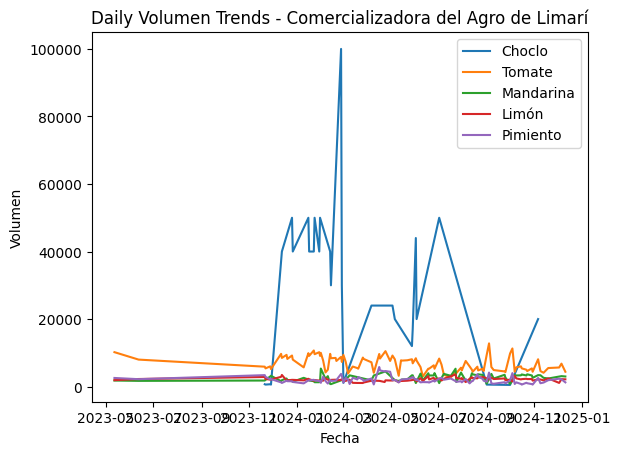

In [ ]:
# Group by date and product
limari_daily = limari_data.groupby(['Fecha', 'Producto'])['Volumen'].sum().reset_index()

# Plot daily volume trends for top products
top_products = limari_daily.groupby('Producto')['Volumen'].sum().sort_values(ascending=False).head(5).index

for product in top_products:
    product_data = limari_daily[limari_daily['Producto'] == product]
    plt.plot(product_data['Fecha'], product_data['Volumen'], label=product)

plt.title('Daily Volumen Trends - Comercializadora del Agro de Limarí')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.show()

Step 3: Identify Critical Inventory Levels
Calculate critical inventory levels for each product.

In [ ]:
# Calculate mean and standard deviation of volumes
limari_critical_levels = limari_daily.groupby('Producto')['Volumen'].agg(['mean', 'std']).reset_index()
limari_critical_levels['Critical_Level'] = limari_critical_levels['mean'] - limari_critical_levels['std']

# Merge back with daily data to identify critical days
limari_daily = pd.merge(limari_daily, limari_critical_levels[['Producto', 'Critical_Level']], on='Producto')
limari_critical_days = limari_daily[limari_daily['Volumen'] < limari_daily['Critical_Level']]

print("Critical Inventory Days for Comercializadora del Agro de Limarí:")
print(limari_critical_days)

Critical Inventory Days for Comercializadora del Agro de Limarí:
          Fecha         Producto  Volumen  Critical_Level
9    2023-05-12         Nectarín       16       28.120037
32   2023-11-21        Alcachofa      500      939.987087
35   2023-11-21           Choclo      700     6035.835988
42   2023-11-21     Pepino dulce      160      488.393998
49   2023-11-22        Alcachofa      400      939.987087
...         ...              ...      ...             ...
1526 2024-12-06     Arveja Verde      200      229.641271
1527 2024-12-06         Frutilla      480      566.151850
1534 2024-12-06  Pepino ensalada      400      453.545499
1541 2024-12-11        Alcachofa      240      939.987087
1555 2024-12-11           Tomate     4400     4634.216288

[242 rows x 4 columns]


Step 4: Predict Inventory Breaks
Fit a predictive model to forecast inventory levels for top products.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Iterate through top products
for product in top_products:
    product_data = limari_daily[limari_daily['Producto'] == product]
    product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
    product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())

    # Train-Test Split - Adjust split based on data size
    if len(product_data) > 30:
        train_size = len(product_data) - 30  # Ensure train data has at least one sample
        train = product_data.iloc[:train_size]
        test = product_data.iloc[train_size:]
    else:
        # Handle cases with less than 30 data points (e.g., skip or use all data for training)
        print(f"Insufficient data for {product}. Skipping...")
        continue

    # Train model
    model = RandomForestRegressor()
    model.fit(train[['Fecha_ordinal']], train['Volumen'])

    # Predict future inventory levels
    future_dates = pd.date_range(start=product_data['Fecha'].max(), periods=30)
    future_dates_ordinal = [d.toordinal() for d in future_dates]
    future_predictions = model.predict(pd.DataFrame(future_dates_ordinal, columns=['Fecha_ordinal']))

    # Identify potential inventory breaks
    future_breaks = future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]]
    print(f"Predicted Inventory Breaks for {product}: {len(future_breaks)} days")

<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-40-482f2ecbd920>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Insufficient data for Choclo. Skipping...
Predicted Inventory Breaks for Tomate: 0 days
Predicted Inventory Breaks for Mandarina: 0 days
Predicted Inventory Breaks for Limón: 0 days


<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-40-482f2ecbd920>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Predicted Inventory Breaks for Pimiento: 0 days


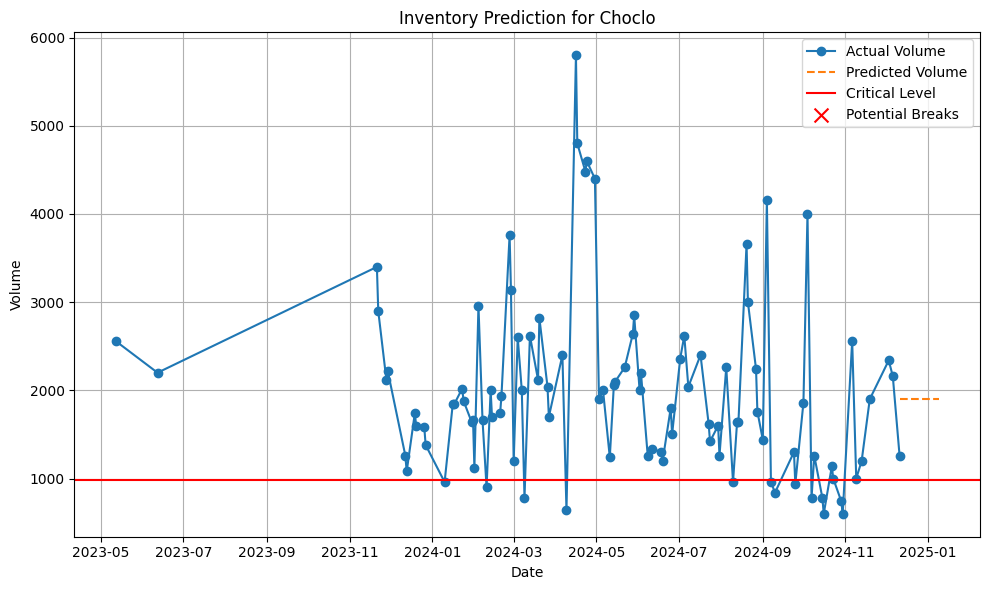

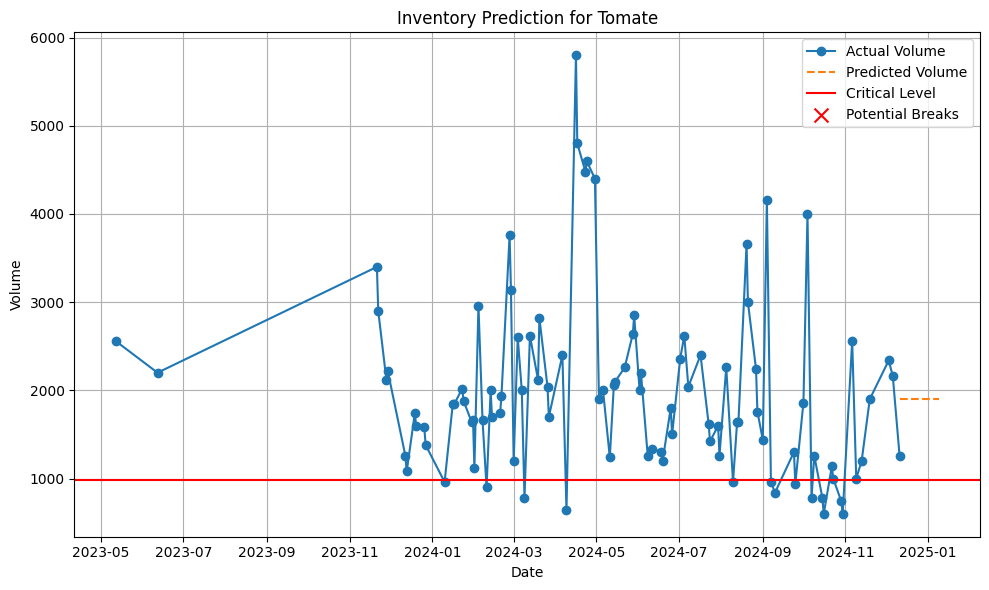

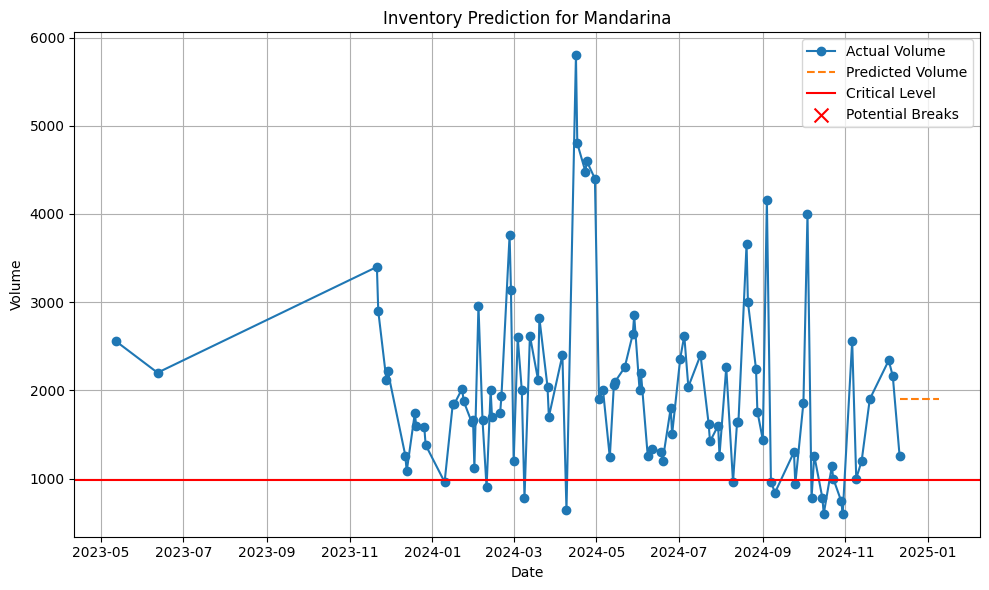

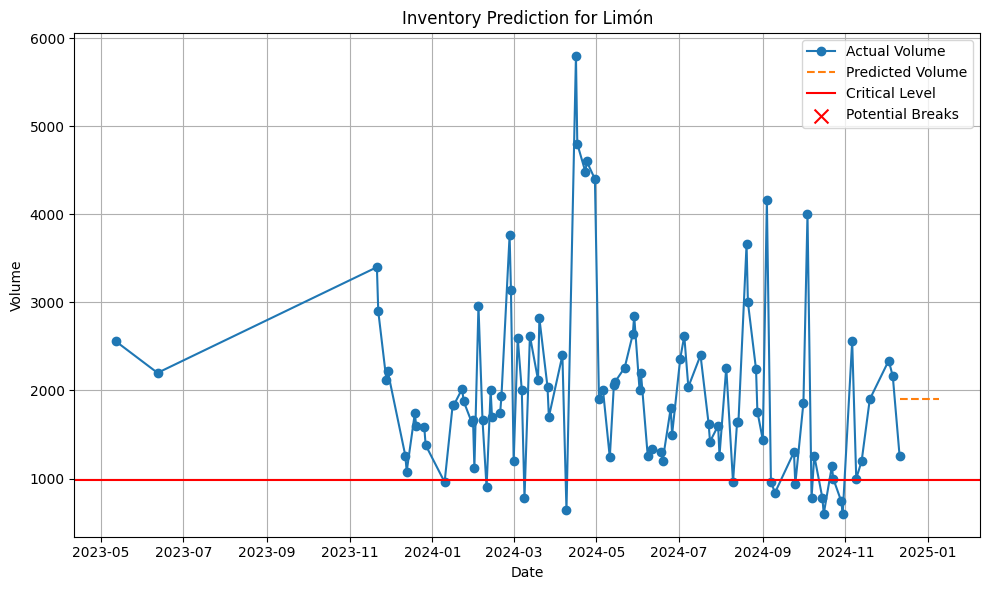

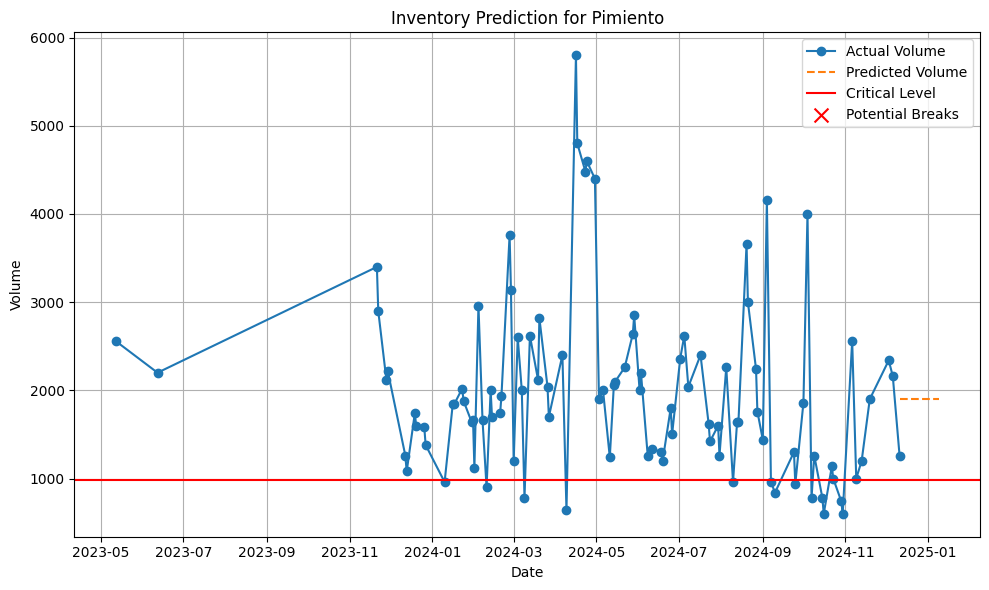

In [ ]:
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ... (Your existing code for data preparation and model training) ...

# Plotting the results
for product in top_products:
    # ... (Your existing code for data preparation and model training for each product) ...

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(product_data['Fecha'], product_data['Volumen'], label='Actual Volume', marker='o')  # Actual data
    plt.plot(future_dates, future_predictions, label='Predicted Volume', linestyle='--')  # Predicted data
    plt.axhline(product_data['Critical_Level'].iloc[0], color='red', linestyle='-', label='Critical Level')  # Critical level

    # Highlight potential breaks
    break_dates = future_dates[future_predictions < product_data['Critical_Level'].iloc[0]]
    plt.scatter(break_dates, future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]], color='red', marker='x', s=100, label='Potential Breaks')

    plt.title(f'Inventory Prediction for {product}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Step 5: Market Prescriptive Analysis
Recommend products to cultivate for Comercializadora del Agro de Limarí.

High-demand products: Identify products with consistently high volumes and prices.
Critical inventory products: Focus on products with frequent inventory breaks.

In [ ]:
# Aggregate data for recommendations
limari_recommendations = limari_daily.groupby('Producto').agg({
    'Volumen': 'sum',
    'Critical_Level': 'mean'
}).reset_index()

# Merge with price data
average_prices = limari_data.groupby('Producto')['Precio promedio ponderado'].mean().reset_index()
limari_recommendations = pd.merge(limari_recommendations, average_prices, on='Producto')

# Prioritize products with high prices and critical inventory
limari_recommendations = limari_recommendations.sort_values(by=['Critical_Level', 'Precio promedio ponderado'], ascending=[True, False])

print("Recommended Products for Comercializadora del Agro de Limarí:")
print(limari_recommendations)

# Save recommendations to CSV
limari_recommendations.to_csv('limari_recommendations.csv')
files.download('limari_recommendations.csv')

Recommended Products for Comercializadora del Agro de Limarí:
            Producto  Volumen  Critical_Level  Precio promedio ponderado
9            Durazno     7858      -23.500374              274905.462132
7            Ciruela      654       19.050357              246422.893424
14           Naranja     4900       27.112689              165429.767360
15          Nectarín     1892       28.120037              338144.740600
8            Damasco     2830      110.287012               21728.691425
3    Arándano (blue)     8700      154.170134                7707.457934
0                Ají    28760      155.996317               26377.331372
2       Arveja Verde    27500      229.641271               22807.017493
25  Zapallo italiano    17340      262.337541                9771.908723
21      Poroto verde    40400      282.217324               21218.487337
20    Poroto granado    12640      322.900101               20990.135126
24               Uva    38530      332.460297                9

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Insufficient data for Choclo. Skipping...
Predicted Inventory Breaks for Tomate: 0 days


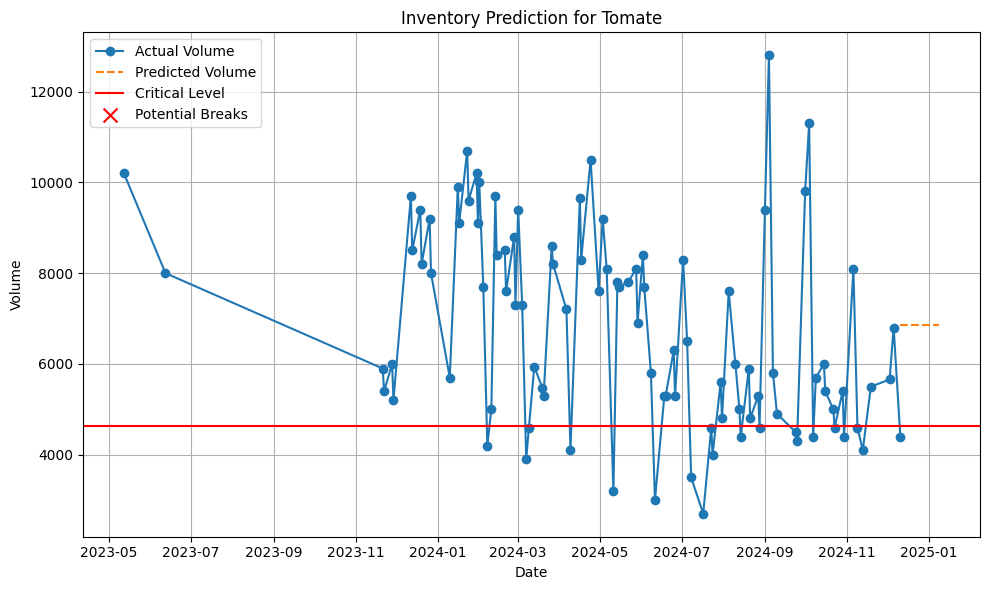

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())


Predicted Inventory Breaks for Mandarina: 0 days


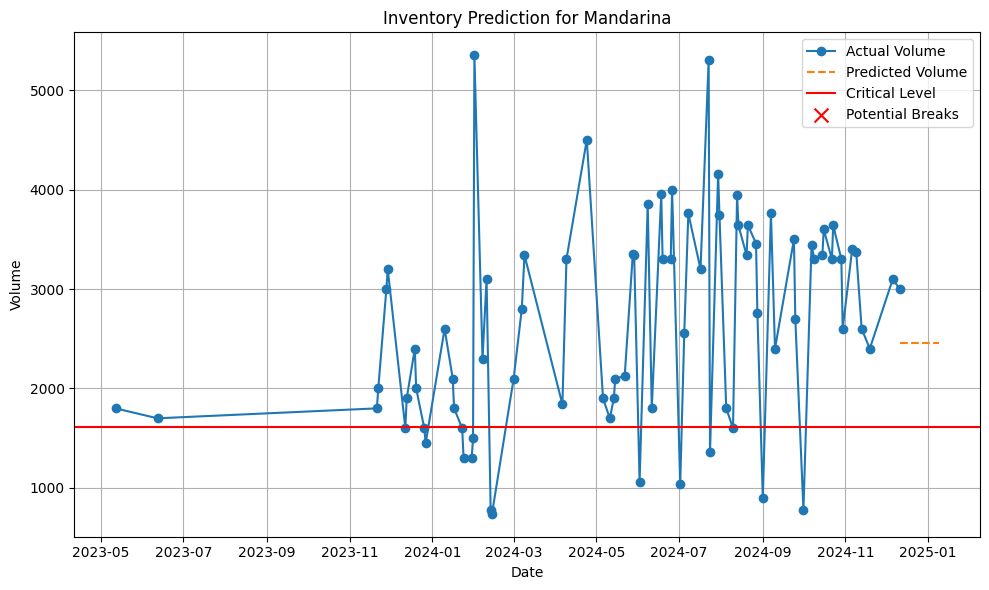

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())


Predicted Inventory Breaks for Limón: 0 days


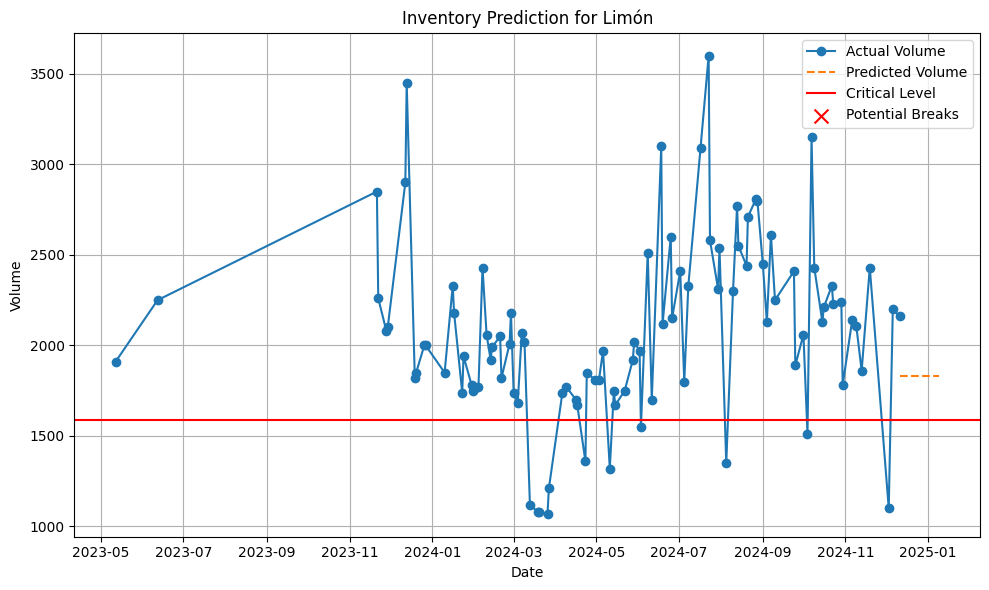

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())


Predicted Inventory Breaks for Pimiento: 0 days


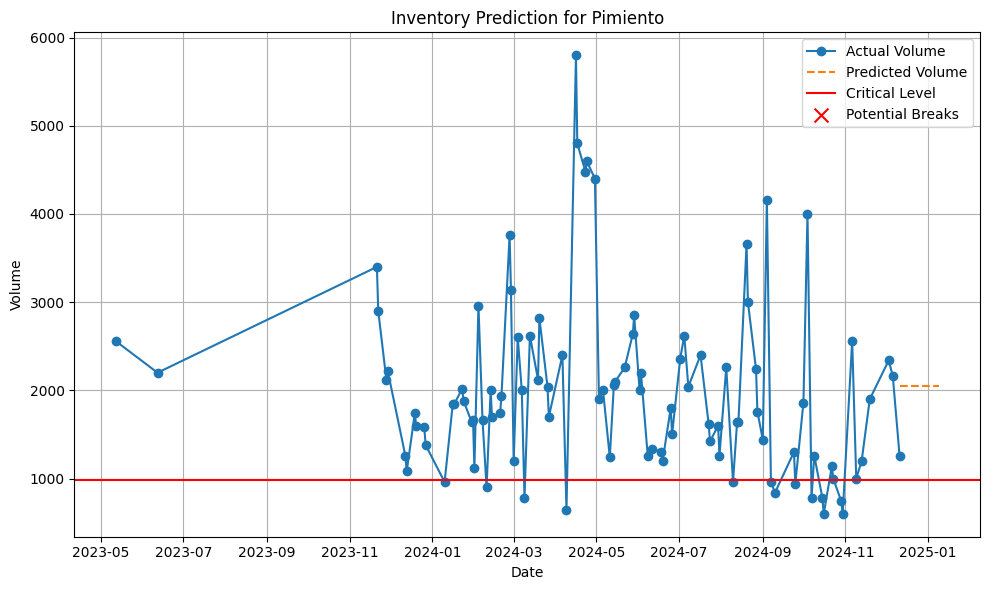

In [ ]:
!pip install matplotlib pandas scikit-learn

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'limari_daily' and 'top_products' are already defined
# ... (Your existing code for data preparation) ...

for product in top_products:
    product_data = limari_daily[limari_daily['Producto'] == product]
    product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
    product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())

    # Train-Test Split - Adjust split based on data size
    if len(product_data) > 30:
        train_size = len(product_data) - 30  # Ensure train data has at least one sample
        train = product_data.iloc[:train_size]
        test = product_data.iloc[train_size:]
    else:
        # Handle cases with less than 30 data points (e.g., skip or use all data for training)
        print(f"Insufficient data for {product}. Skipping...")
        continue

    # Train model
    model = RandomForestRegressor()
    model.fit(train[['Fecha_ordinal']], train['Volumen'])

    # Predict future inventory levels
    future_dates = pd.date_range(start=product_data['Fecha'].max(), periods=30)
    future_dates_ordinal = [d.toordinal() for d in future_dates]
    future_predictions = model.predict(pd.DataFrame(future_dates_ordinal, columns=['Fecha_ordinal']))

    # Identify potential inventory breaks
    future_breaks = future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]]
    print(f"Predicted Inventory Breaks for {product}: {len(future_breaks)} days")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(product_data['Fecha'], product_data['Volumen'], label='Actual Volume', marker='o')
    plt.plot(future_dates, future_predictions, label='Predicted Volume', linestyle='--')
    plt.axhline(product_data['Critical_Level'].iloc[0], color='red', linestyle='-', label='Critical Level')

    # Highlight potential breaks
    break_dates = future_dates[future_predictions < product_data['Critical_Level'].iloc[0]]
    plt.scatter(break_dates, future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]], color='red', marker='x', s=100, label='Potential Breaks')

    plt.title(f'Inventory Prediction for {product}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

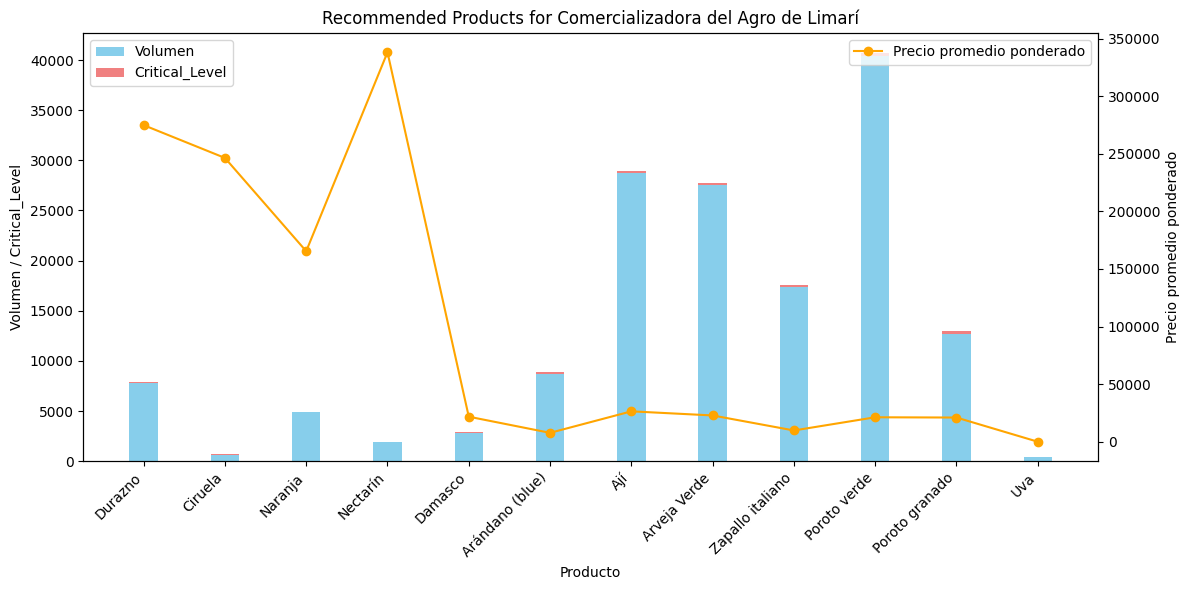

In [ ]:
!pip install matplotlib pandas

import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Producto': ['Durazno', 'Ciruela', 'Naranja', 'Nectarín', 'Damasco', 'Arándano (blue)', 'Ají', 'Arveja Verde', 'Zapallo italiano', 'Poroto verde', 'Poroto granado', 'Uva'],
    'Volumen': [7858, 654, 4900, 1892, 2830, 8700, 28760, 27500, 17340, 40400, 12640, 385],
    'Critical_Level': [-23.500374, 19.050357, 27.112689, 28.120037, 110.287012, 154.170134, 155.996317, 229.641271, 262.337541, 282.217324, 322.900101, 0],  # Assuming 0 for Uva
    'Precio promedio ponderado': [274905.462132, 246422.893424, 165429.767360, 338144.740600, 21728.691425, 7707.457934, 26377.331372, 22807.017493, 9771.908723, 21218.487337, 20990.135126, 0]  # Assuming 0 for Uva
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Volumen and Critical_Level
width = 0.35
ax1.bar(df['Producto'], df['Volumen'], width, label='Volumen', color='skyblue')
ax1.bar(df['Producto'], df['Critical_Level'], width, label='Critical_Level', color='lightcoral', bottom=df['Volumen'])

ax1.set_ylabel('Volumen / Critical_Level')
ax1.set_xlabel('Producto')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax1.legend(loc='upper left')

# Line plot for Precio promedio ponderado
ax2 = ax1.twinx()
ax2.plot(df['Producto'], df['Precio promedio ponderado'], color='orange', marker='o', label='Precio promedio ponderado')
ax2.set_ylabel('Precio promedio ponderado')
ax2.legend(loc='upper right')

plt.title('Recommended Products for Comercializadora del Agro de Limarí')
plt.tight_layout()
plt.show()